In [1]:
#initialize required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#these are standard libraries for data analyis and visualization in Python

Initially, the datasource is from the spotify developer API. The plan was to pull songs and information directly from the streaming service using the python library spotipy. However, Spotify rate limits only allow for a limited number of tracks when combined with features that using it for a machine learning project would require more resources. Additionally, data is only available from me as a user. Since I have not built an extensive library in Spotify, the output may be biased so I opted for a pre-processed data from Kaggle showing the top 2000 songs from Spotify.

In [2]:
df=pd.read_csv("C:/Users/ait0s/Downloads/Spotify-2000.csv")

In [3]:
'''The head function in pandas allows us to see the first five rows of the dataset
unless otherwise noted'''

df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


There are many ways to inspect the dataset prior to analysis and processing. Although the head() function, and its counterpart tail(), provides a way to quickly view the data structure, it is often insufficient. Especially when there are several hundred rows or more. My preference is the info() because it shows the column names, datatypes and counts the non-null rows in each column. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


Dimensionality Reduction

In datasets populated with several features, fine-tuning the data can help optimize models. For example, columns with a high percentage of null values are dropped or imputed. For this particular dataset, there are 0 non-null values. So one of the ways we can reduce the variables is to perform statistical analysis to understand, as a whole, how these features look like. The describe() function provides a high-level summary of the numerical features in our dataset. For example, the average BPM for the top songs is 120 BPMs, whereas the max danceability score is at 96. The acousticness has the highest standard deviation, which gives us an idea of how much the diversity in the values for that column. 

In [5]:
df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


For the output of the describe() function,we see the statistical summary of the Year column, which really should be considered more as a date object so that analysis wouldn't be applicable. .

In [6]:
#Year analysis to see if this is relevant in the calculation for recommendation
num_songs_annual=df['Year'].value_counts()
num_songs_annual

2008    54
1991    52
2018    52
1977    51
2002    47
        ..
1962     3
1959     3
1961     1
1960     1
1956     1
Name: Year, Length: 63, dtype: int64

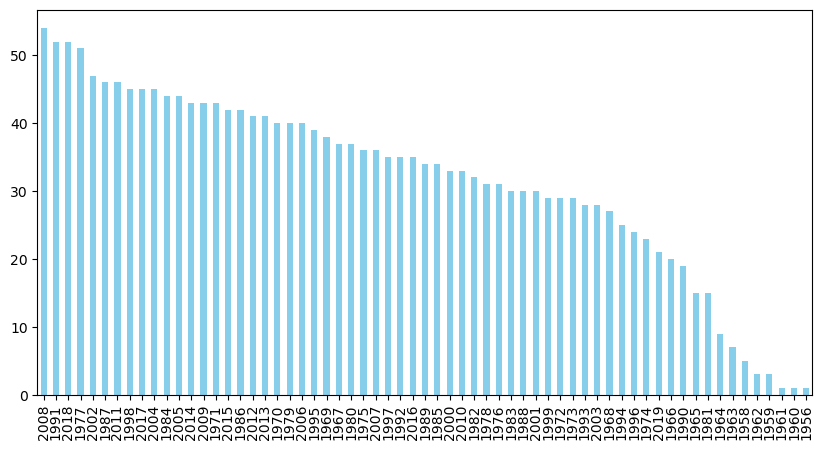

In [7]:
#Visualizing the dataset represents the information better
plt.figure(figsize = (10,5)) #initial run showed plot not big enough to show all years so we override default
num_songs_annual.plot(kind='bar', color='skyblue')
plt.show()

I then separated the numerical columns so we can use them in further understanding the dataset. For example, one of the ways we can eliminate noise in our dataset is to find features that are highly correlated to each other. I used the Correlation matrix with a threshold of .80 because anything too low risks our dataset for data loss. So anything with a correlation score of +-.80 will be identified and reduced to help optimize the model

In [8]:
dfforcorr=df[["Beats Per Minute (BPM)","Energy","Danceability","Loudness (dB)","Liveness","Valence","Acousticness","Speechiness","Popularity"]]
corr_matrix = dfforcorr.corr()
print(corr_matrix)

                        Beats Per Minute (BPM)    Energy  Danceability  \
Beats Per Minute (BPM)                1.000000  0.156644     -0.140602   
Energy                                0.156644  1.000000      0.139616   
Danceability                         -0.140602  0.139616      1.000000   
Loudness (dB)                         0.092927  0.735711      0.044235   
Liveness                              0.016256  0.174118     -0.103063   
Valence                               0.059653  0.405175      0.514564   
Acousticness                         -0.122472 -0.665156     -0.135769   
Speechiness                           0.085598  0.205865      0.125229   
Popularity                           -0.003181  0.103393      0.144344   

                        Loudness (dB)  Liveness   Valence  Acousticness  \
Beats Per Minute (BPM)       0.092927  0.016256  0.059653     -0.122472   
Energy                       0.735711  0.174118  0.405175     -0.665156   
Danceability                 0.044

<Axes: >

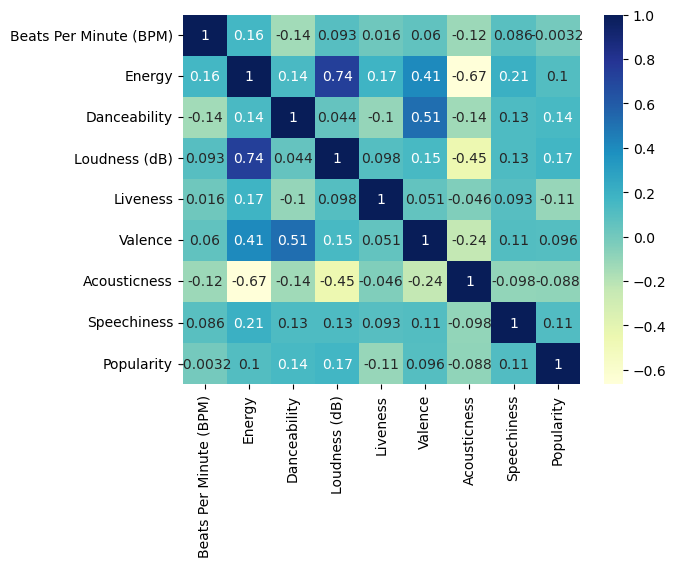

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu") #color palette from https://python-graph-gallery.com/

I initially used the correlation matrix to understand how each variable affect the other, however, i found it difficult to read so I also used the correlation heatmap. In the visualization, its easier to identify the characteristics of each song that relates to each other. For example, we see that energy and loudness scores are highly correlated (positively) to each other as well as energy and acousticness (negatively). When we think of these features in a song, it makes sense how high energy music can be perceived as loud, while acoustic tracks have lower energies. They, however, did not meet the threshold score so I decided to keep all the numeric features in the dataset.

In an effort to understand the features of the dataset, I used a histogram to understand their distribution. Because we're using the most popular songs from the streaming service, I wanted to see if the population agreed on what makes music good. According to this file, most of the features stay close to a normak distribution. For example, the most popular danceability score is at 50. Meaning, most listeners like their music just right.

C:\Users\ait0s\AppData\Local\Temp\ipykernel_21524\2920447815.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


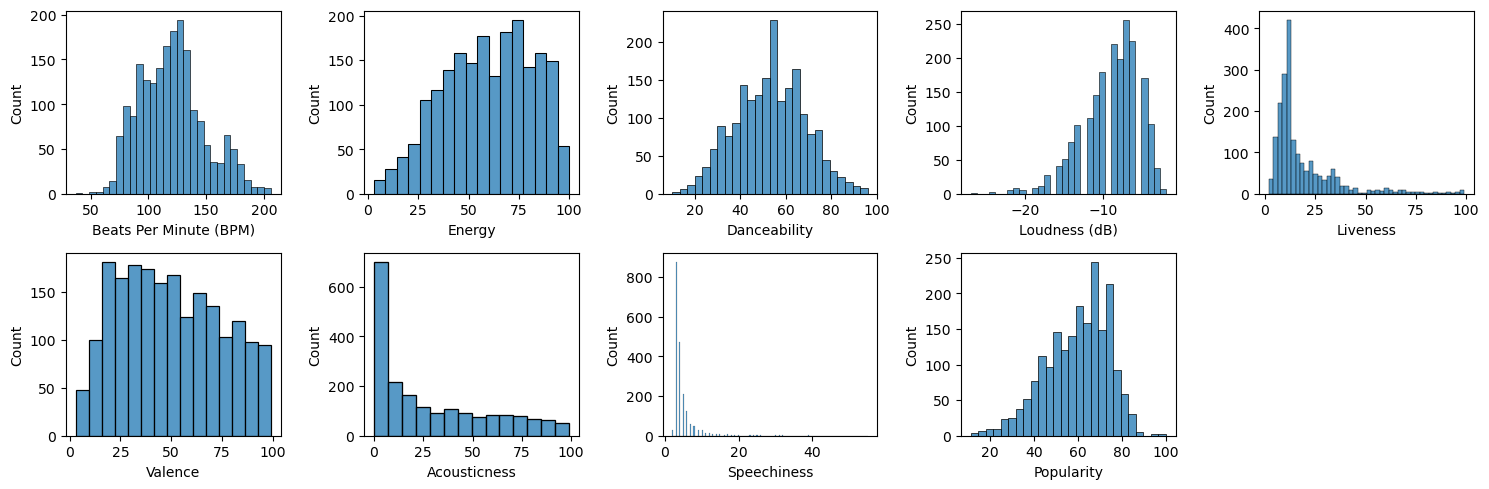

In [10]:
plt.subplots(figsize = (15,5))
for i, col in enumerate(dfforcorr):
    plt.subplot(2,5,i+1)
    sns.histplot(df[col])
plt.tight_layout()    
plt.show()

I would like to then use these features to help determine songs that are similar to the given input, song_name. I will be implementing the Euclidean distance algorithm by using these features as data points and calculating the distance between every pair of points from these variables. I chose this because I feel that its the most straightforward way to find similarities between songs based on their characteristics. Basically, we find the features that describe our input songs and find songs that sound the same based on their data points. The bigger their distance are, the more different the songs sound like. Euclidean distance can be calculated several ways in python as linalg in numpy, euclidean spatial distance from scipy, but for our model, I wil be using sci-kit learn. 

In [11]:
#initialize sklearn library for euclidean distance

from sklearn.metrics.pairwise import euclidean_distances

Before we can build the function to calculate the distance between the distance, we must first plot these datapoints into a matrix and create a new dataframe using 'Title' as index so we can assign the features to the title and use them as reference. 

In [12]:
matrix = euclidean_distances(dfforcorr)
matrix_df = pd.DataFrame(matrix, index=df['Title'], columns=df['Title'])


This function uses the dataframe above that calculated the feature distance for each row/song title as a reference to calculate other songs based on their characteristics. It takes the parameters input_song as the basis of the recommendation, the matrix_df as the datasource, and number of recommendations which can be manipulated based on the desired output. An exception handler is added in to the function to direct user if their error is input-based. Here again, we used the features we used earlier lik4e head function and the sort_values to obtain the titles that are most similar to our input based on features. 

In [18]:
def recommender_feat_dist(input_song, matrix_df, number_of_recommendations=5):
    if input_song not in matrix_df.index:
        return f"The song {input_song} is not on our database.Try again"
    
    distances = matrix_df[input_song]
    shortest_distance = distances.sort_values(ascending=True)
    recommended_songs = shortest_distance.head(number_of_recommendations).index.tolist()
    return recommended_songs

In [19]:
input_song= "The Pretender"
recommended = recommender_feat_dist(input_song, matrix_df)
print(recommended)

['The Pretender', 'Everlong', 'Epic', "Don't Look Back In Anger - Remastered", 'Sabotage']


In a recommender system, validating results can be a challenge because it requires user ratings to determine if the recommendation suits what the user is looking for. Initially, this was a potential use-case for the spotipy API which I ran into some challenges using as a datasource. As an alternative, I am using a second recommender system that will use music genres as a reference point. 

In [20]:
genre_analysis=df['Top Genre'].value_counts()
genre_analysis

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

In [21]:
genre_analysis= df.groupby('Top Genre')['Popularity'].sum().sort_values(ascending=False)
genre_analysis

Top Genre
album rock                     25067
adult standards                 7697
alternative rock                5757
dance pop                       5687
alternative metal               4621
                               ...  
australian alternative rock       33
rock-and-roll                     33
compositional ambient             28
streektaal                        28
classic italian pop               24
Name: Popularity, Length: 149, dtype: int64

In [22]:
#to maintain the integrity of the initial dataset, I will be using a copied df as a data source for this model
rec_df1=df.copy()

In this model, because we are using "genre" with an object/text datatype, we need to perform feature transformation to fit in our model. The sklearn documentation provides a detailed explanation of the library but here we are using it so that the text features in the Genre column are converted into numerical features and indexed accordingly. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
genre_vector=CountVectorizer()
genre_vector.fit(rec_df1['Top Genre'])

CountVectorizer()

For this model, we will be using cosine similarity to measure words, in this case, after the transformation vectors are alike. Earlier we measured the distance between the datapoints from our features/scores for each song, here we are using genres from the song input and the database to determine the output. 

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

The first function takes the input song from the earlier recommender system and calculates the vector based on the genre. Then the similarity for each vector is stored as a reference point. This allows us, for every row, to create datapoints based on genre and other numerical features as a comparison to the database we're using for the recommender system

In [25]:
def spotify_recommender_genre(input_song, reference):
  input_transform = genre_vector.transform(reference[reference['Title']==input_song]['Top Genre']).toarray()
  input_array = reference[reference['Title']==input_song].select_dtypes(include=np.number).to_numpy()
   
  sim = []
  for idx, row in reference.iterrows():
    name = row['Title']
     
    rec_transform = genre_vector.transform(reference[reference['Title']==name]['Top Genre']).toarray()
    rec_array = reference[reference['Title']==name].select_dtypes(include=np.number).to_numpy()
 
    text_sim = cosine_similarity(input_transform, rec_transform)[0][0]
    feature_sim = cosine_similarity(input_array, rec_array)[0][0]
    sim.append(text_sim + feature_sim)
     
  return sim

The second function takes the input_song along with the transformation we did with it and finds other songs from the database(reference) that is closest to it in terms of genre and feature (similarity_score). To create the output, we sort the recommendations based on similarity_score and Popularity to increase the likelihood that the user will find the input songs and recommended songs as alike. As we did with the previous model, an exception is created in case the input song does not match any of the Titles in the database. 

In [26]:
def find_similar_songs(input_song, reference=rec_df1):
  if rec_df1[rec_df1['Title'] == input_song].shape[0] == 0:
    print('This song is not on our database\
    Check out these other recommendations:\n')
     
    for song in reference.sample(n=7)['Title'].values:
      print(song)
    return
   
  reference['similarity_score'] = spotify_recommender_genre(input_song, reference)
 
  reference.sort_values(by=['similarity_score', 'Popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  print(reference[['Title', 'Artist','Top Genre']][:7])

In [27]:
find_similar_songs(input_song)

                      Title               Artist          Top Genre
3             The Pretender         Foo Fighters  alternative metal
1723               Everlong         Foo Fighters  alternative metal
1484                   Epic        Faith No More  alternative metal
357       How You Remind Me           Nickelback  alternative metal
1583  Plush - 2017 Remaster  Stone Temple Pilots  alternative metal
1814      The Dolphin's Cry                 Live  alternative metal
89         Times Like These         Foo Fighters  alternative metal


By using the features available to us, we are able to create a recommender system that provides an output similar to the input song. We are able to verify this information by using Artist and Genre as a reference to compare their similarities. 